![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [113]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [114]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


**Remark** <br>
The Netflix database comprises `7,787 movies` and TV shows, with 11 distinct features. Additionally, certain features such as `director, cast,` and `country` exhibit instances of missing values.

In [115]:
# taking a peek at our dataset
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [116]:
# grouping the dataset based on the `type` and `genre`
netflix_df[['type', 'genre']].value_counts()

type     genre               
Movie    Dramas                  1384
         Comedies                1074
         Documentaries            751
         Action                   721
TV Show  International TV         690
Movie    Children                 502
TV Show  Crime TV                 369
         Kids                     359
Movie    Stand-Up                 321
         Horror Movies            244
TV Show  British TV               232
         Docuseries               194
         Anime Series             148
Movie    International Movies     114
TV Show  TV Comedies              110
         Reality TV               102
Movie    Classic Movies            77
TV Show  TV Dramas                 62
Movie    Uncategorized             56
         Thrillers                 49
TV Show  TV Action                 37
         Stand-Up                  33
         Romantic TV               28
         Classic                   21
Movie    Independent Movies        20
         Anime Featu

**Remark** <br>
Netflix appears to prioritize the curation or collection of `Drama` and `Comedy` movies, while featuring fewer `Sci-Fi TV shows` in comparison.

In [117]:
# investigating the Movie archieves
netflix_subset = netflix_df[netflix_df['type']=='Movie']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [118]:
keep_cols = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies = netflix_subset[keep_cols]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [119]:
# top 10 countries with the most movies in the netflix database
netflix_movies[['country']].value_counts()[:10]

country       
United States     2100
India              883
United Kingdom     341
Canada             175
France             137
Spain              119
Egypt               93
Mexico              79
Turkey              78
Japan               75
dtype: int64

**Remark** <br>
The dominance of the `United States` in Netflix's movie catalog is unsurprising, given that Netflix is headquartered in the United States. Notably, among Asian countries, `India` holds the 2nd spot and among African countries, `Egypt` holds the highest number of entries in the database, securing the 7th position with a total of 93 films.

In [120]:
# movies shorter than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head() 

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [121]:
print(short_movies.shape[0])
short_movies[['genre']].value_counts()

420


genre               
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
Anime Features            3
International Movies      3
Music                     2
Horror Movies             1
dtype: int64

**Remark** <br>
A total of 420 short films, each lasting less than 60 minutes, are present in the dataset. Among these, the genres most frequently represented are `Documentaries` and `Children` movies. Inspecting the first five entries of our dataframe, titles such as `3 Seconds Divorce` and `A 3 Minute Hug` with durations of 53 and 28 minutes, respectively, reveal a trend. Movies with a direct title don't have complex plots and are therefore shorter in duration.

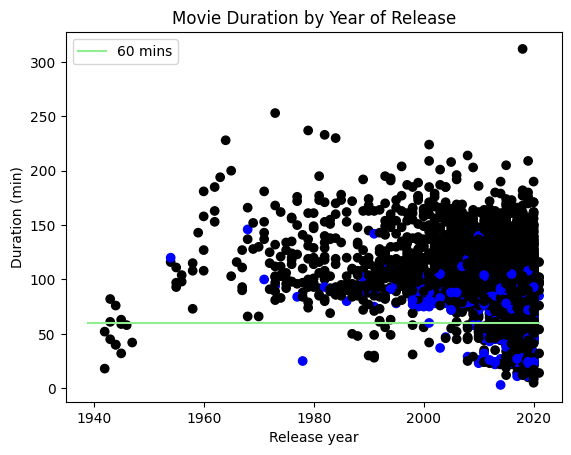

In [122]:
# visualizing the movie duration as years go by

colors = []
for cat in netflix_movies['genre']:
    if cat == 'Children':
        colors.append('blue')
    elif cat == 'Documentary':
        colors.append('red')
    elif cat == 'Stand-up':
        colors.append('yellow')
    else:
        colors.append('black')

fig = plt.figure()
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'],
          color=colors)
plt.plot(range(1939,2022), [60]*83, color='lightgreen', label='60 mins')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.legend(loc=2)

In [123]:
# long movies by century
long_movies = netflix_movies[netflix_movies['duration']>=60]['release_year']

century20 = 0
century21 = 0
for year in long_movies:
    if year > 2000:
        century21 += 1
    else:
        century20 += 1

movie_releases = {'1901 - 2000': century20, '2001 - 2021': century21}
print(movie_releases)

{'1901 - 2000': 411, '2001 - 2021': 4546}


### Question: "Are we certain that movies are getting shorter?"
Analyzing the scatter plot reveals a notable increase in the number of movies during the 21st century (2001 and beyond) compared to the 20th century (1901 - 2000). Moreover, there is a clear trend indicating a higher occurrence of movies lasting over 60 minutes in the 21st century.

In [124]:
answer = 'no'